In [78]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.cluster import KMeans
from alfabeto_data import dissertation_images as di
import numpy as np

In [118]:
ALF_TRAIN = di.k_means_simple(di.alfabeto_notes_data[0], 2, di.label_maker_alfabeto(di.alfabeto_notes_data[1]))
BACH_TRAIN = di.k_means_simple(di.bach_notes_data[0][0:-20], 2, di.label_maker(di.bach_notes_data[1][0:-20]))
PALESTRINA_TRAIN = di.k_means_simple(di.palestrina_notes_data[0], 5, di.label_maker_alfabeto(di.palestrina_notes_data[1]))
ZMO_TRAIN = di.k_means_simple(di.zmo_notes_data[0][0:-20], 5, di.label_maker_alfabeto(di.zmo_notes_data[1][0:-20]))
ZMA_TRAIN = di.k_means_simple(di.zma_notes_data[0][0:-20], 4, di.label_maker_alfabeto(di.zma_notes_data[1][0:-20]))
ZSO_TRAIN = di.k_means_simple(di.zso_notes_data[0][0:-20], 2, di.label_maker_alfabeto(di.zso_notes_data[1][0:-20]))

In [119]:
ALF_LABELS = [x for x in ALF_TRAIN['kmeans'].labels_]
BACH_LABELS = [x+2 for x in BACH_TRAIN['kmeans'].labels_]
PALESTRINA_LABELS = [x+4 for x in PALESTRINA_TRAIN['kmeans'].labels_]
ZMO_LABELS = [x+9 for x in ZMO_TRAIN['kmeans'].labels_] #9, 10, 11, 12, 13
ZMA_LABELS = [x+14 for x in ZMA_TRAIN['kmeans'].labels_] #14, 15, 16, 17
ZSO_LABELS = [x+18 for x in ZSO_TRAIN['kmeans'].labels_] #18, 19

In [120]:
all_corpus = di.alfabeto_notes_data[0]+ \
             di.bach_notes_data[0][0:-20]+di.palestrina_notes_data[0]+ \
             di.zmo_notes_data[0]+di.zma_notes_data[0]+di.zso_notes_data[0]
        
all_jrp = di.zmo_notes_data[0][0:-20]+di.zma_notes_data[0][0:-20]+di.zso_notes_data[0][0:-20]
all_jrp_labels = np.array(ZMO_LABELS+ZMA_LABELS+ZSO_LABELS)
        
all_labels = np.array(ALF_LABELS+BACH_LABELS+PALESTRINA_LABELS+ZMO_LABELS+ZMA_LABELS+ZSO_LABELS)

In [121]:
clf = NearestCentroid()

In [122]:
clf.fit(all_jrp, all_jrp_labels)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [130]:
ja = 0
na = 0
for x, y in zip(di.zso_notes_data[1][:-20], di.zso_notes_data[0][:-20]):
    
    if clf.predict([y])[0] in [18, 19]:
        ja += 1
    else:
        na += 1
    print(clf.predict([y]))
    print(x)
print(ja, na)

[15]
(-1, 7)
[15]
(-1, 7)
[18]
(-1, 7)
[10]
(-1, 7)
[10]
(0, 2)
[10]
(-1, 7)
[11]
(0, 4)
[10]
(-1, 7)
[10]
(-1, 7)
[13]
(0, 9)
[16]
(0, 7)
[10]
(-1, 7)
[10]
(-1, 7)
[19]
(0, 5)
[9]
(0, 0)
[9]
(0, 0)
[14]
(-1, 5)
[10]
(-1, 7)
[10]
(-1, 7)
[10]
(0, 2)
[17]
(0, 4)
[9]
(0, 0)
[12]
(0, 7)
[13]
(0, 9)
[13]
(-1, 2)
[13]
(0, 9)
[14]
(0, 0)
[18]
(0, 9)
[11]
(0, 4)
[15]
(-1, 7)
[9]
(-1, 5)
[13]
(0, 9)
[14]
(-1, 5)
[19]
(-1, 5)
[18]
(0, 2)
[13]
(0, 9)
[16]
(0, 7)
[19]
(-1, 5)
[16]
(0, 7)
[13]
(0, 9)
[12]
(0, 7)
[10]
(-1, 7)
[12]
(0, 7)
[10]
(-1, 7)
[11]
(0, 4)
[10]
(-1, 7)
[9]
(-1, 5)
[16]
(0, 7)
[10]
(0, 2)
[18]
(-1, 7)
[10]
(-1, 7)
[9]
(-1, 5)
[12]
(0, 7)
[10]
(-1, 7)
[10]
(-1, 7)
[13]
(0, 9)
[10]
(0, 2)
[11]
(0, 9)
[13]
(0, 9)
[18]
(0, 2)
[18]
(-1, 7)
[10]
(-1, 7)
[10]
(0, 2)
[16]
(0, 7)
[18]
(0, 9)
[10]
(-1, 7)
[17]
(-1, 2)
[9]
(0, 0)
[13]
(0, 9)
[10]
(0, 2)
[13]
(0, 9)
[17]
(0, 9)
[10]
(-1, 7)
[19]
(-1, 5)
[10]
(-1, 7)
[11]
(0, 4)
[10]
(-1, 7)
[15]
(-1, 7)
[10]
(0, 7)
[12]
(0, 7)
[9]
(0, 0)


In [63]:
di.zso_notes_data[1][7]

(-1, 7)

None 0.386363636364
0.2 0.380303030303


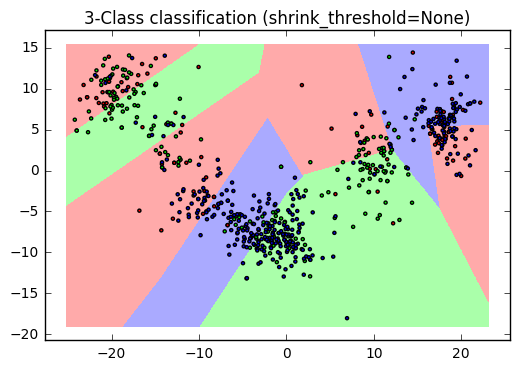

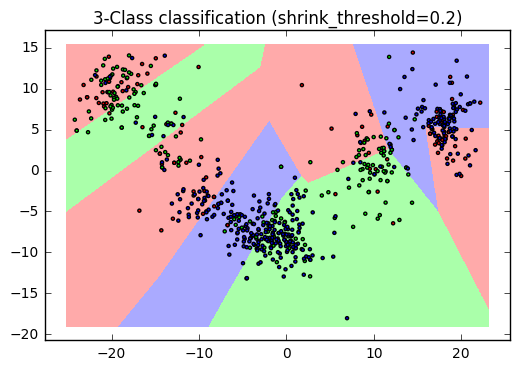

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid
from sklearn.decomposition import PCA

n_neighbors = 20

# import some data to play with
iris = datasets.load_iris()
X = PCA(n_components=2).fit_transform(all_jrp)  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = all_jrp_labels

h = .02  # step size in the mesh
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black
# w: white
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for shrinkage in [None, .2]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], marker='.', c=y, cmap=cmap_bold)
    plt.title("3-Class classification (shrink_threshold=%r)"
              % shrinkage)
    plt.axis('tight')

plt.show()

In [72]:
PCA(n_components=2).fit_transform(all_corpus)

array([[ 15.44161532,   1.64767028],
       [-10.20452099,  -2.75634057],
       [ -8.56341623,  -3.15127788],
       ..., 
       [ -9.54693021,  -8.61222656],
       [ -6.38306865,  -3.50338721],
       [ 13.64548558,   2.64015098]])